In [639]:
import os
import sys
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image
from pdf2image import convert_from_path
import cv2
from pathlib import Path
from tqdm import tqdm
import math
import pdfplumber
import pytesseract as pyt
%matplotlib inline

In [611]:
test_name = "2006_11"
data_dir = Path("../data/")
raw_dir = data_dir/"raw"
pdf_dir = data_dir/"pdf"
pdf_path = pdf_dir/(test_name+".pdf")
output_dir = raw_dir/test_name

# pdf to png
just when convert pdf to png

In [612]:
pages = convert_from_path(str(pdf_path))
if pages:
    print("convert done")
if not os.path.exists(output_dir):
    os.mkdir(output_dir)
    print(f"mkdir {output_dir}")
for i, page in enumerate(pages):
    png_path = output_dir/(str(i)+".png")
    if not os.path.exists(png_path):
        page.save(str(png_path), "PNG")

convert done
mkdir ../data/raw/2006_11


In [490]:
# pages = convert_from_path(str(pdf_path))

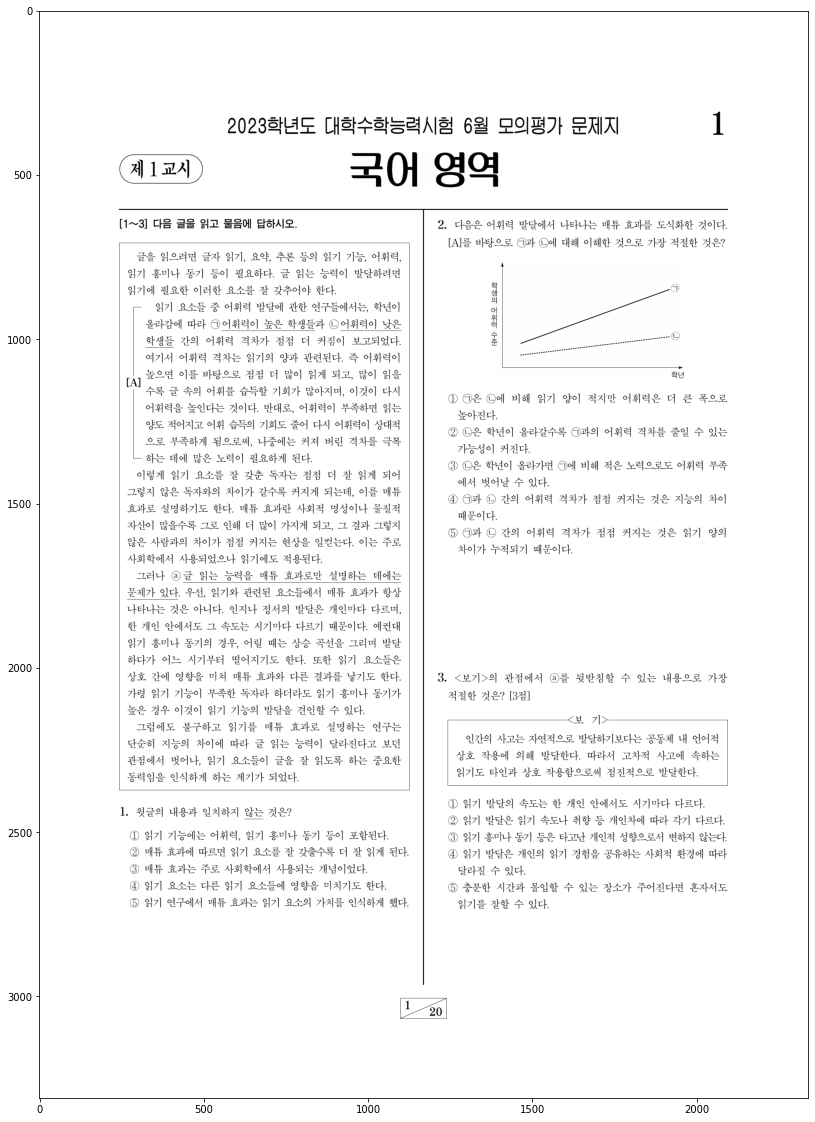

In [521]:
# img = np.array(pages[0])
# gray = cv2.cvtColor(img[:,:,::-1],cv2.COLOR_BGR2GRAY)
# imshow(gray)

# edge detection

In [613]:
png_file = str(output_dir / "0.png")

In [614]:
def imshow(img):
    fig, ax= plt.subplots(1,1, figsize=(20,20))
    ax.imshow(img, cmap = "gray")

(3306, 2337, 3)


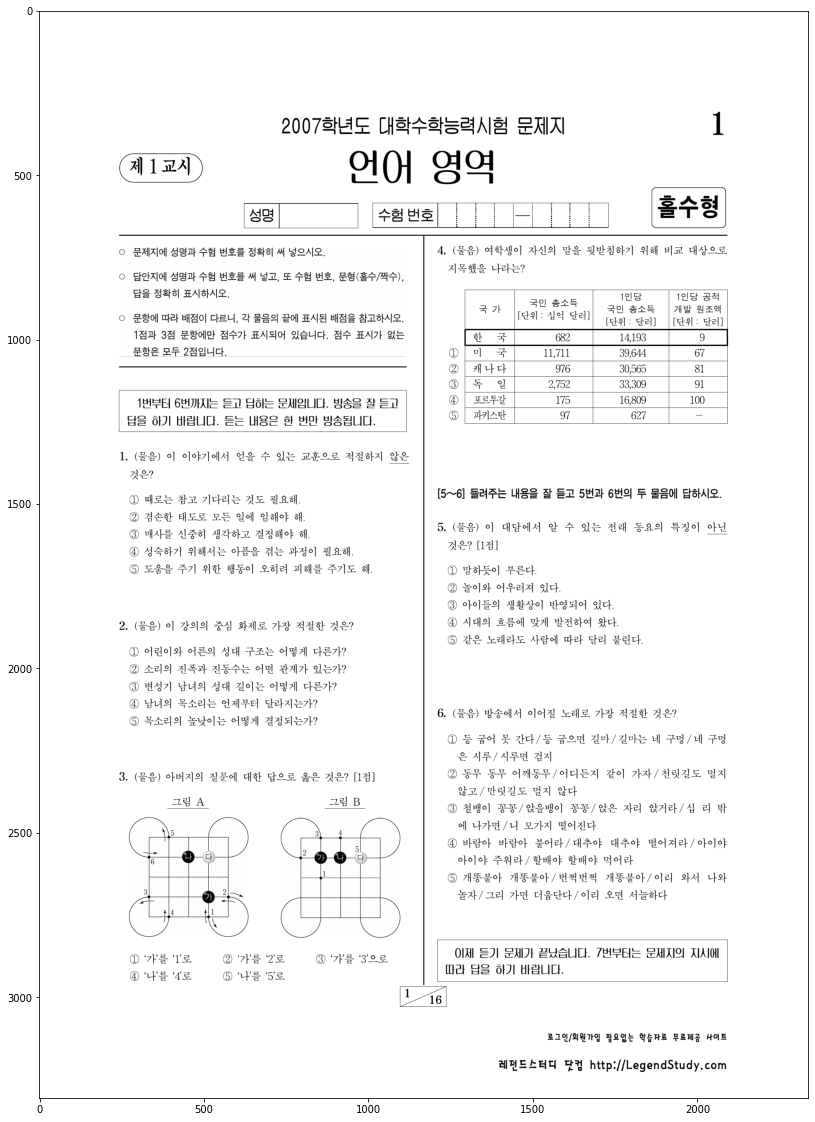

In [615]:
# Load the image
img = cv2.imread(png_file)
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
print(img.shape)
imshow(gray)

In [616]:
thresh1 = 1520
thresh2 = 1000
dst = cv2.Canny(gray, thresh1, thresh2)
# canny 조정 참고
# https://engineer-mole.tistory.com/243

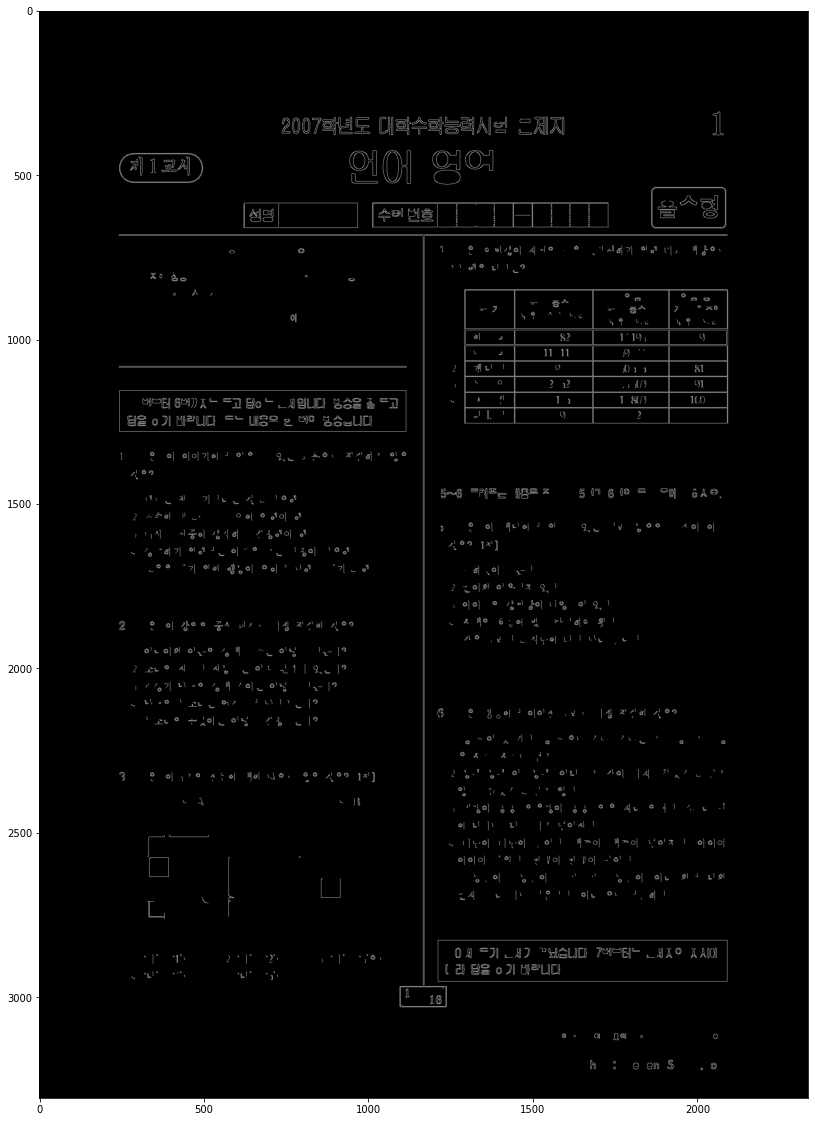

In [617]:
imshow(dst)

In [618]:
# Copy edges to the images that will display the results in BGR
cdst = cv2.cvtColor(dst, cv2.COLOR_GRAY2BGR)

# problematic hough
lines = cv2.HoughLinesP(dst, 1, np.pi / 180, 1000, None, 1000, 10)
print(len(lines))

# extract T lines function
def extract_T(lines):
    '''
    arguments : list([x1,y1,x2,y2])
    return : (max length horizontal line, max length vertical line)
    '''
    xlen = []
    ylen = []
    maxx = 0
    maxy = 0
    for i, line in enumerate(lines):
        x1,y1,x2,y2 = line[0]
        xlen.append(abs(x2-x1))
        ylen.append(abs(y2-y1))
    xi = xlen.index(max(xlen))
    yi = ylen.index(max(ylen))
    return lines[yi], lines[xi]

T = extract_T(lines)

if T is not None:
    for i in range(0, len(T)):
        l = T[i][0]
        cv2.line(cdst, (l[0], l[1]), (l[2], l[3]), (0,0,255), 3, cv2.LINE_AA)

4


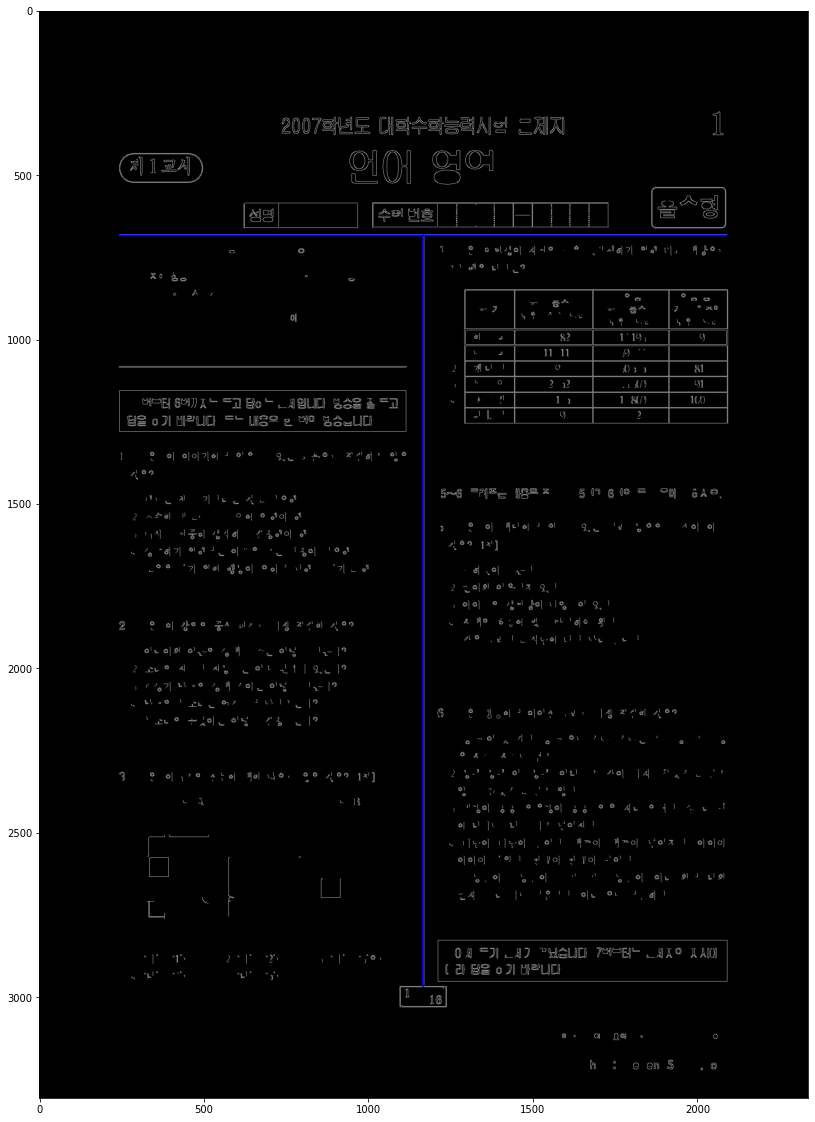

In [619]:
imshow(cdst)

In [620]:
T

(array([[1167, 2968, 1167,  682]], dtype=int32),
 array([[ 243,  685, 2091,  685]], dtype=int32))

In [621]:
x1,y1,_,y0 = T[0][0]
if y0>y1:
    y0,y1 = y1,y0
x0,_,x2,_ = T[1][0]
x0 -= 15
x2 += 15
y0 += 3
y1 += 5

In [622]:
dst.shape

(3306, 2337)

In [623]:
left = gray[y0:y1,x0:x1-5]
right = gray[y0:y1,x1+5:x2]

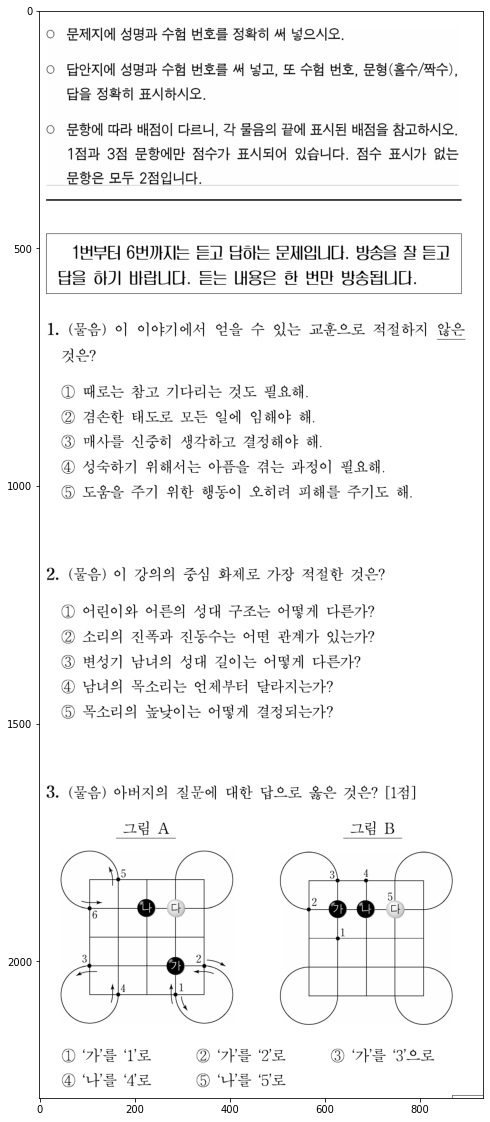

In [624]:
imshow(left)

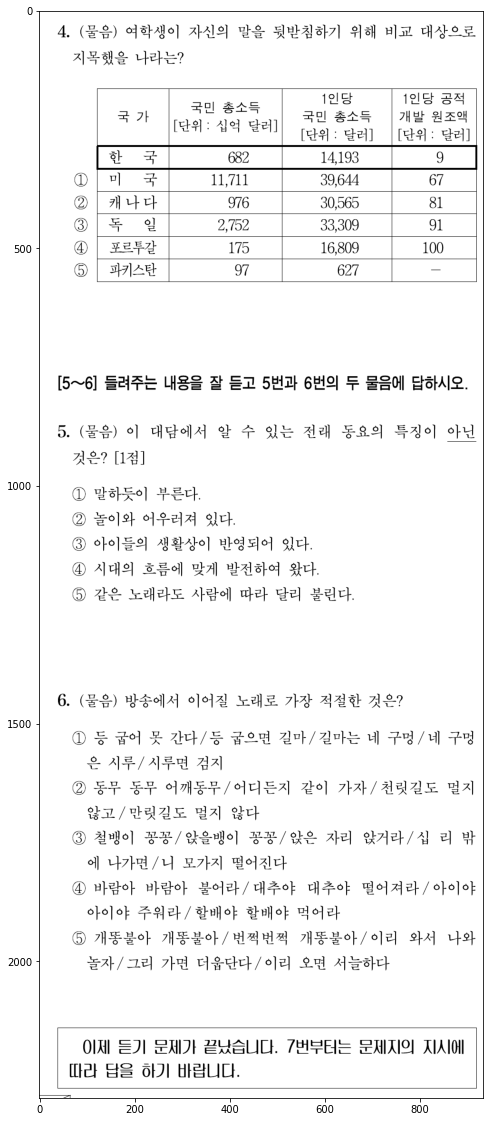

In [625]:
imshow(right)

In [626]:
# pre-processing
_, thresh = cv2.threshold(left, 220, 255, cv2.THRESH_BINARY)
thresh = cv2.bitwise_not(thresh)

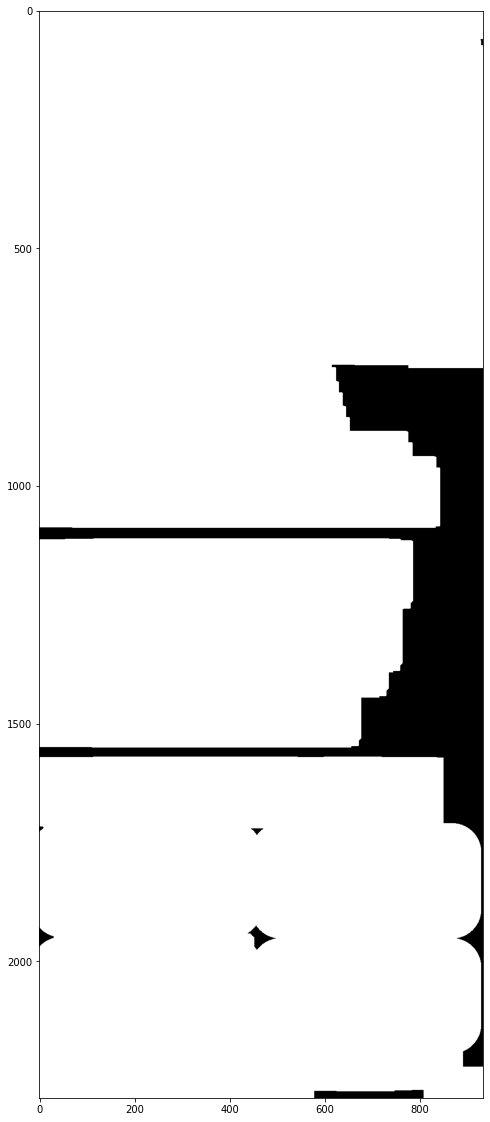

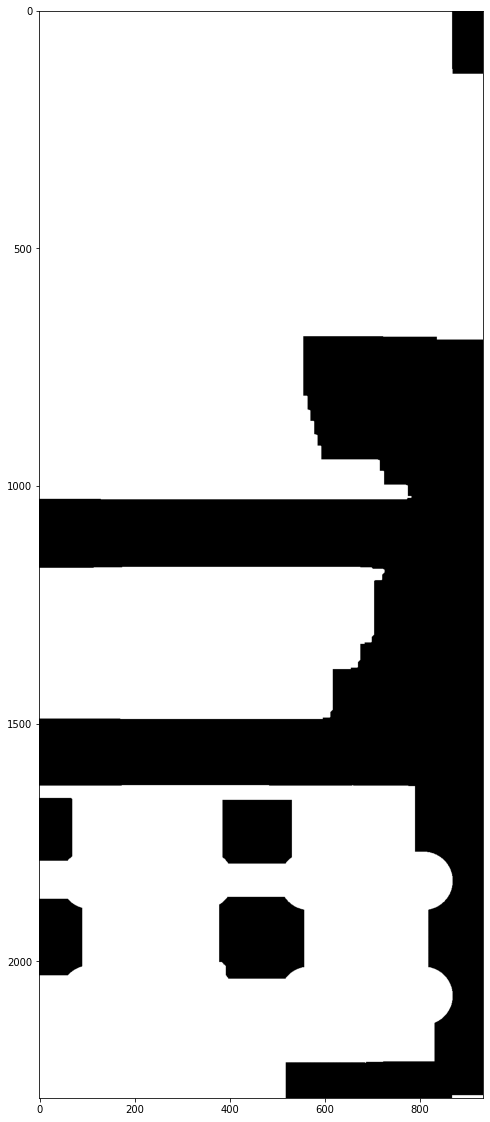

In [627]:
kernel = np.ones((25, 25))
iterations = 5

thresh = cv2.dilate(thresh, kernel, iterations=iterations)
imshow(thresh)
thresh = cv2.erode(thresh, kernel, iterations=iterations)
imshow(thresh)

In [628]:
# find the contours
contours, _ = cv2.findContours(thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# sort y-axis
contours = sorted(contours, key=lambda x: cv2.boundingRect(x)[1])
print(len(contours))

4


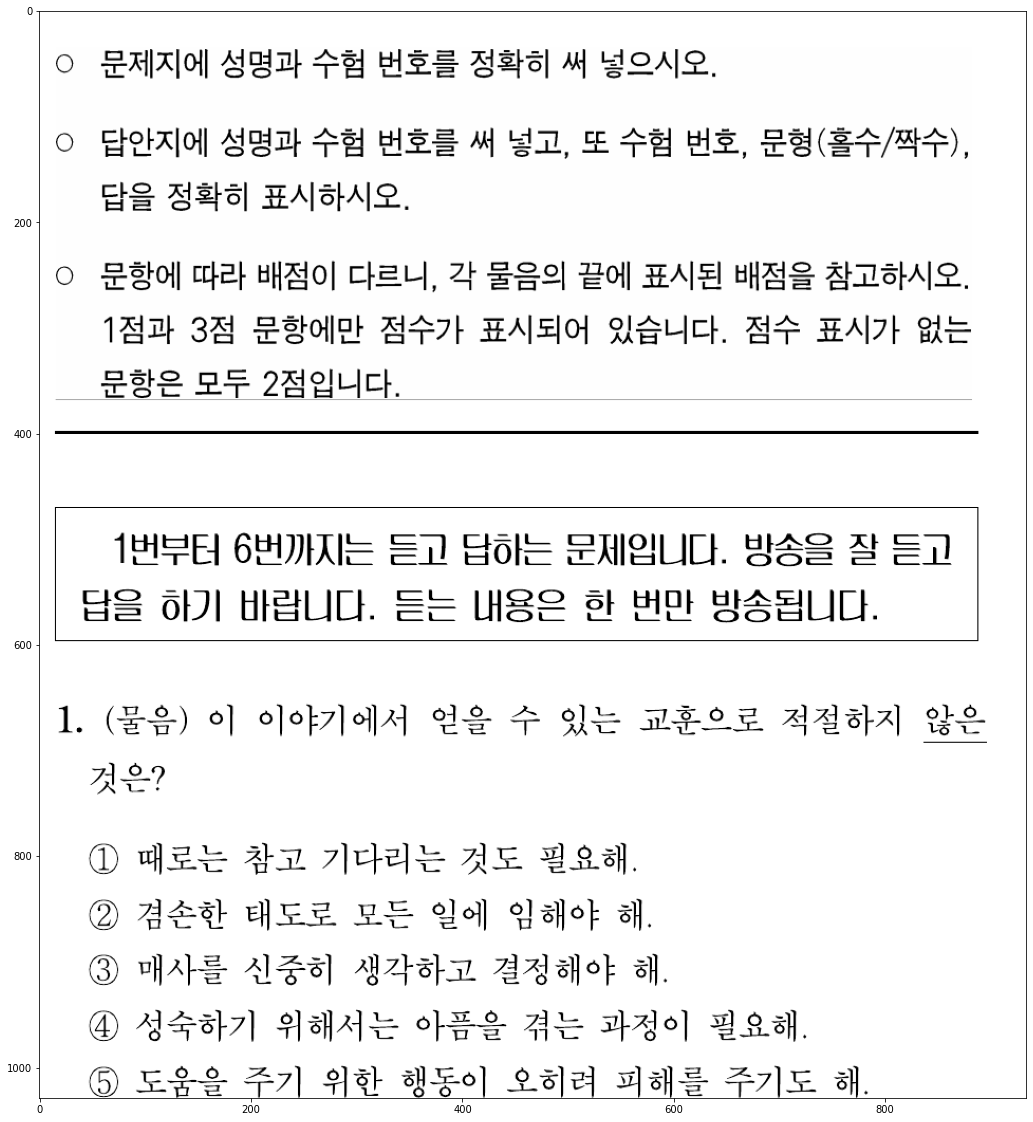

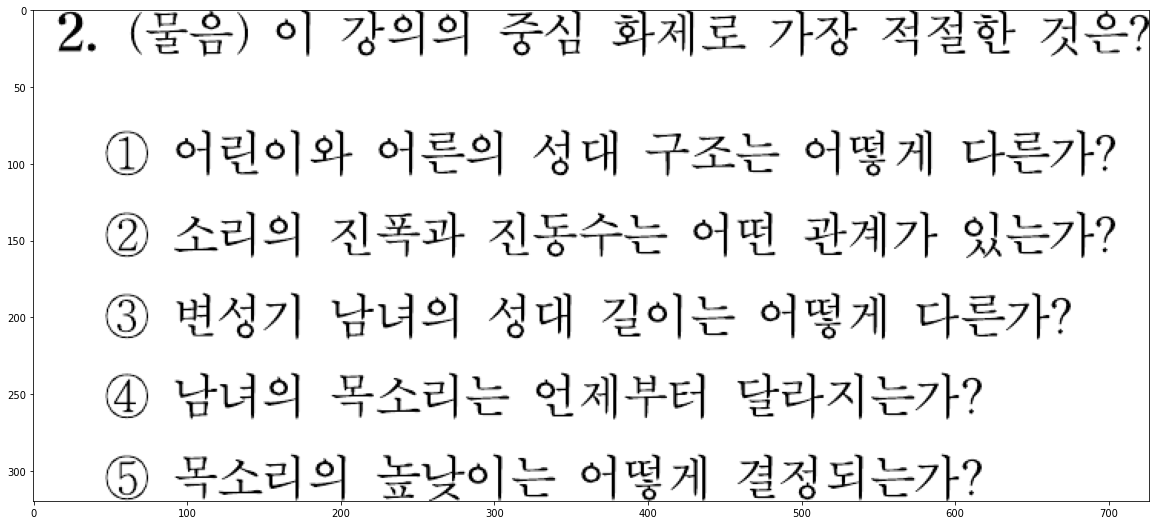

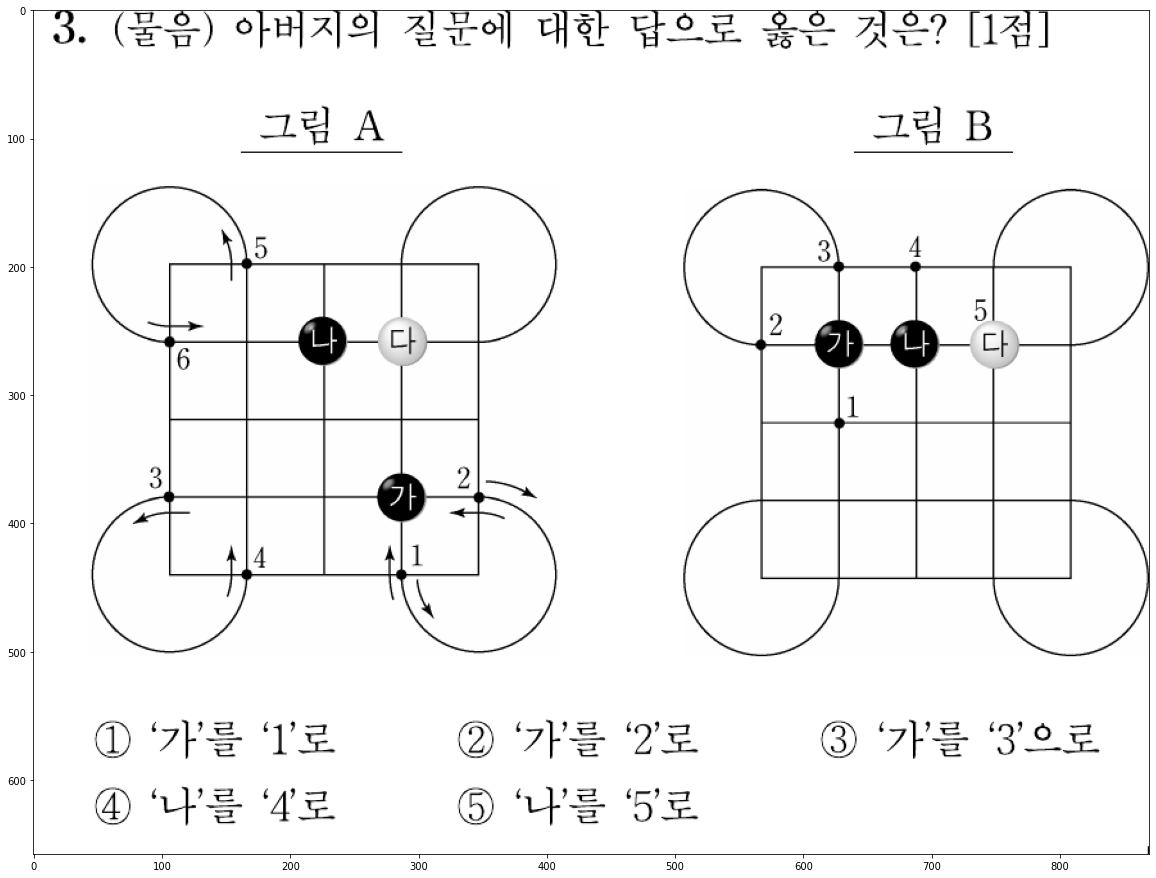

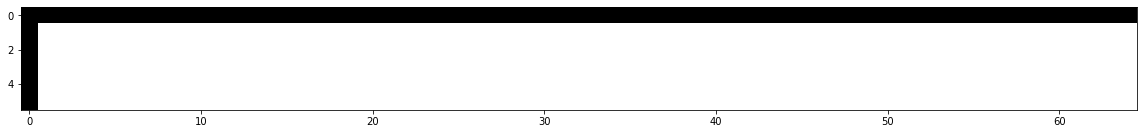

In [629]:
for contour in contours:
    (x, y, w, h) = cv2.boundingRect(contour)
    # if w > cfg.min_width and h > cfg.min_height:
    imshow(left[y : y + h, x : x + w])

## template matching - 물음에 답하시오

In [630]:
template = cv2.imread(str(data_dir/"template"/"moorm.png"))

In [631]:
type(template)

numpy.ndarray

In [632]:
 res = cv2.matchTemplate(img,template,cv2.TM_CCOEFF_NORMED)

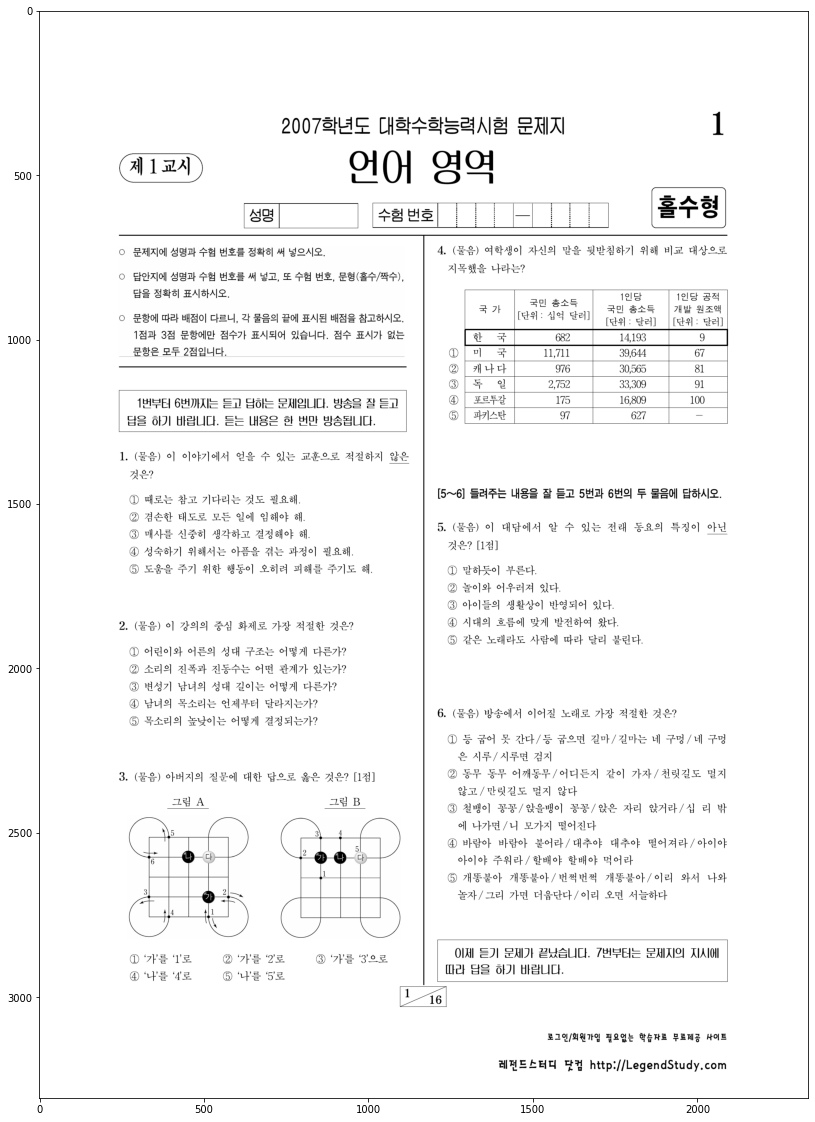

In [633]:
cimg = img.copy()
threshold = 0.8
loc = np.where( res >= threshold)
for pt in zip(*loc[::-1]):
    cv2.rectangle(cimg, pt, (pt[0] + template.shape[1], pt[1] + template.shape[0]), (0,0,255), 2)
imshow(cimg)

## box detector

In [460]:
# 지문 box을 잘라오는 함수
def box_detector(img):
    

SyntaxError: unexpected EOF while parsing (545284095.py, line 3)

## pdf plumber

In [ ]:
def 

In [647]:
cimg = img.copy()
with pdfplumber.open(str(pdf_path)) as pdf:
    first_page = pdf.pages[0]
    first_page
    words = first_page.extract_words()
    idxs = []
    for i, w in enumerate(words):
        if w['text'] == "2.":
            idxs.append(i)
    print(idxs)
    print(words[idxs[0]])
    w = words[idxs[0]]
    x0 = int(w['x0'])
    x1 = int(w['x1'])
    top = int(w['top'])
    bottom = int(w['bottom'])
    print(x0,x1,top,bottom)
    cv2.rectangle(cimg, (x0, top), (x1, bottom), (0,0,255), 2)
    
    print(first_page.search("물음에"))
    

[177]
{'text': '2.', 'x0': 87.744108, 'x1': 97.81544384288, 'top': 667.9664224, 'doctop': 667.9664224, 'bottom': 680.4410144000001, 'upright': True, 'direction': 1}
87 97 667 680
[{'text': '물음에', 'groups': (), 'x0': 668.988889, 'top': 523.6209992, 'x1': 699.5239637272359, 'bottom': 535.8556952, 'chars': [{'matrix': (0.119869, 0.0, 0.0, 0.119948, 668.988889, 656.591244), 'fontname': 'unknown', 'adv': 88.74, 'upright': True, 'x0': 668.988889, 'y0': 654.1443048, 'x1': 679.62606406, 'y1': 666.3790008, 'width': 10.637175060000004, 'height': 12.234695999999985, 'size': 12.234695999999985, 'object_type': 'char', 'page_number': 1, 'text': '물', 'stroking_color': 0, 'non_stroking_color': 0, 'top': 523.6209992, 'bottom': 535.8556952, 'doctop': 523.6209992}, {'matrix': (0.119869, 0.0, 0.0, 0.119948, 678.937838833618, 656.591244), 'fontname': 'unknown', 'adv': 88.74, 'upright': True, 'x0': 678.937838833618, 'y0': 654.1443048, 'x1': 689.575013893618, 'y1': 666.3790008, 'width': 10.637175060000004, '